In [7]:
from basic_fcn import FCN
from resnet_fcn import ResNet
import time
from torch.utils.data import DataLoader
import torch
import gc
import voc
import torchvision.transforms as standard_transforms
import util
import numpy as np
import multiprocessing
from util import iou, pixel_acc, plot_losses
import copy
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.transforms as T

In [8]:

num_workers = multiprocessing.cpu_count()

class MaskToTensor(object):
    def __call__(self, img):
        return torch.from_numpy(np.array(img, dtype=np.int32)).long()


def init_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.xavier_uniform_(m.weight.data)
        if m.bias is not None:   
            torch.nn.init.normal_(m.bias.data) #xavier not applicable for biases



#TODO Get class weights
def getClassWeights():
    # TODO for Q4.c || Caculate the weights for the classes
    raise NotImplementedError

# normalize using imagenet averages
mean_std = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 

input_transform = standard_transforms.Compose([
    standard_transforms.ToTensor(),
    standard_transforms.Normalize(*mean_std)
])
augmentations = [('crop', .3), ('horizontal_flip', .3)]
# augmentations = None

target_transform = MaskToTensor()


In [9]:
train_dataset = voc.VOC('train', transform=input_transform, target_transform=target_transform, augmentations=augmentations)
val_dataset = voc.VOC('val', transform=input_transform, target_transform=target_transform, augmentations=augmentations)
# test_dataset = voc.VOC('test', transform=input_transform, target_transform=target_transform)

val_dataset,test_dataset = torch.utils.data.random_split(val_dataset,[0.5,0.5])

train_loader = DataLoader(dataset=train_dataset, batch_size= 16, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(dataset=val_dataset, batch_size= 16, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(dataset=test_dataset, batch_size= 16, shuffle=False, num_workers=num_workers)

Processing data for train data. Found 1464 images.
Processing data for val data. Found 2913 images.


Training Data:


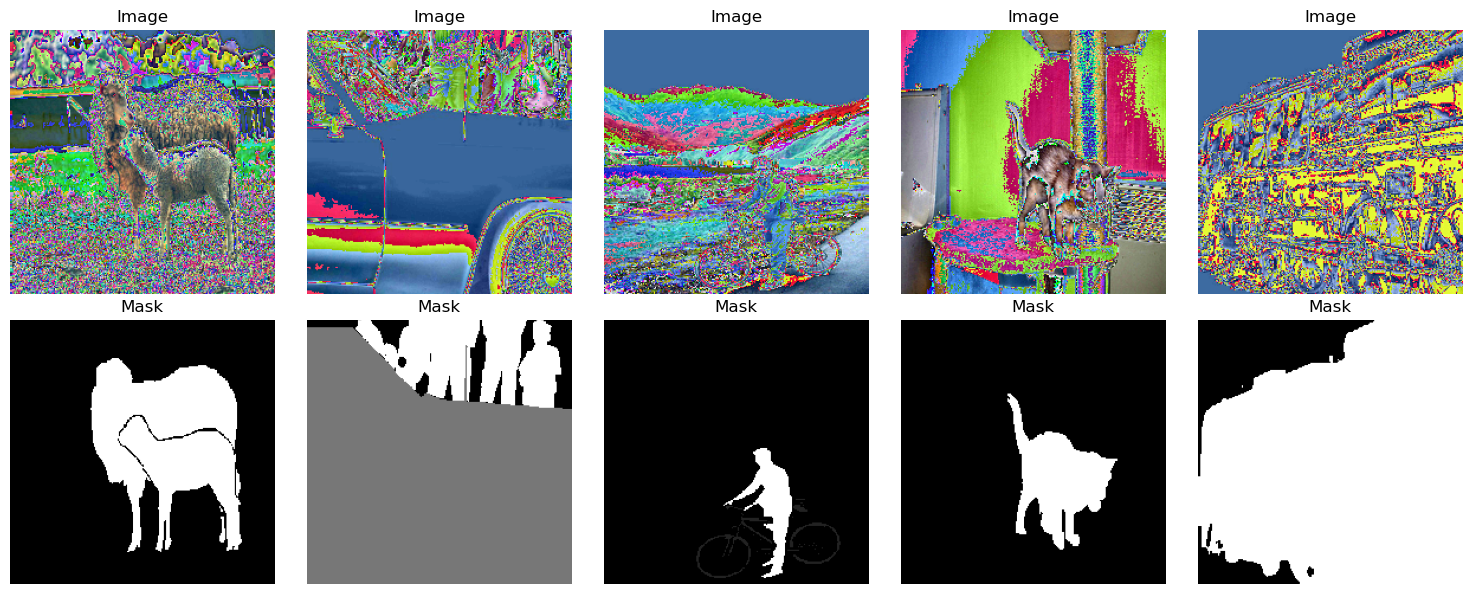

Validation Data:


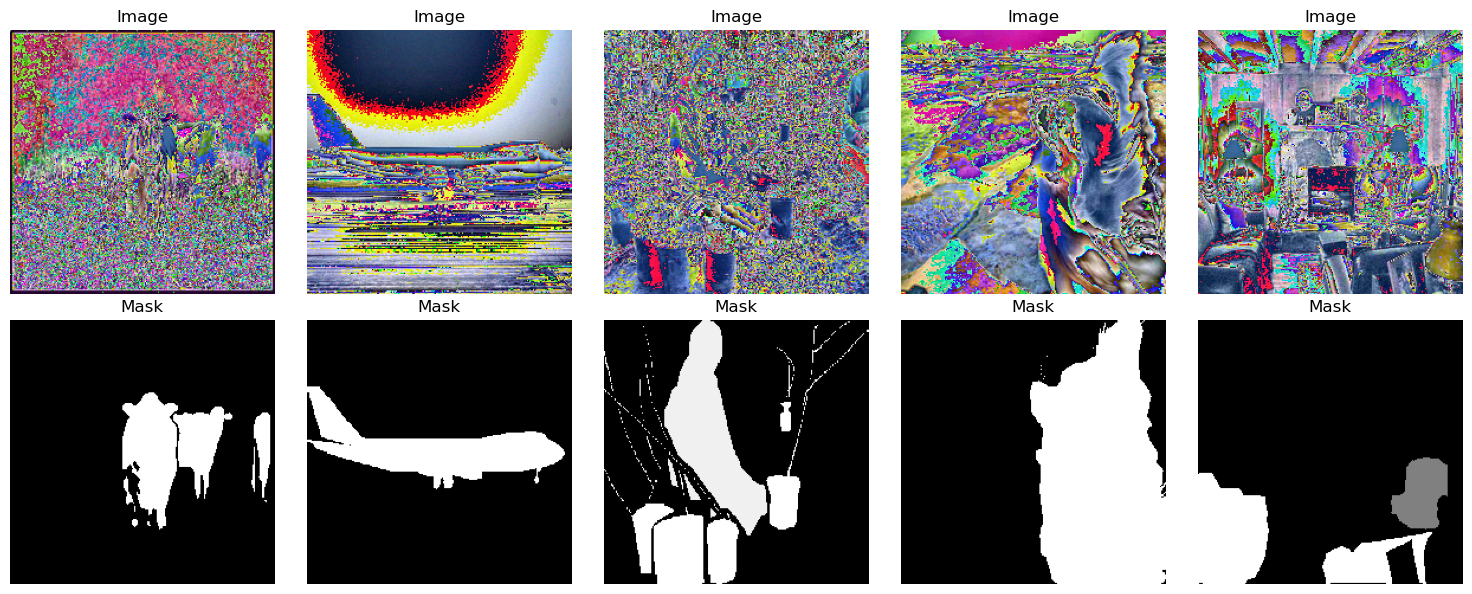

Test Data:


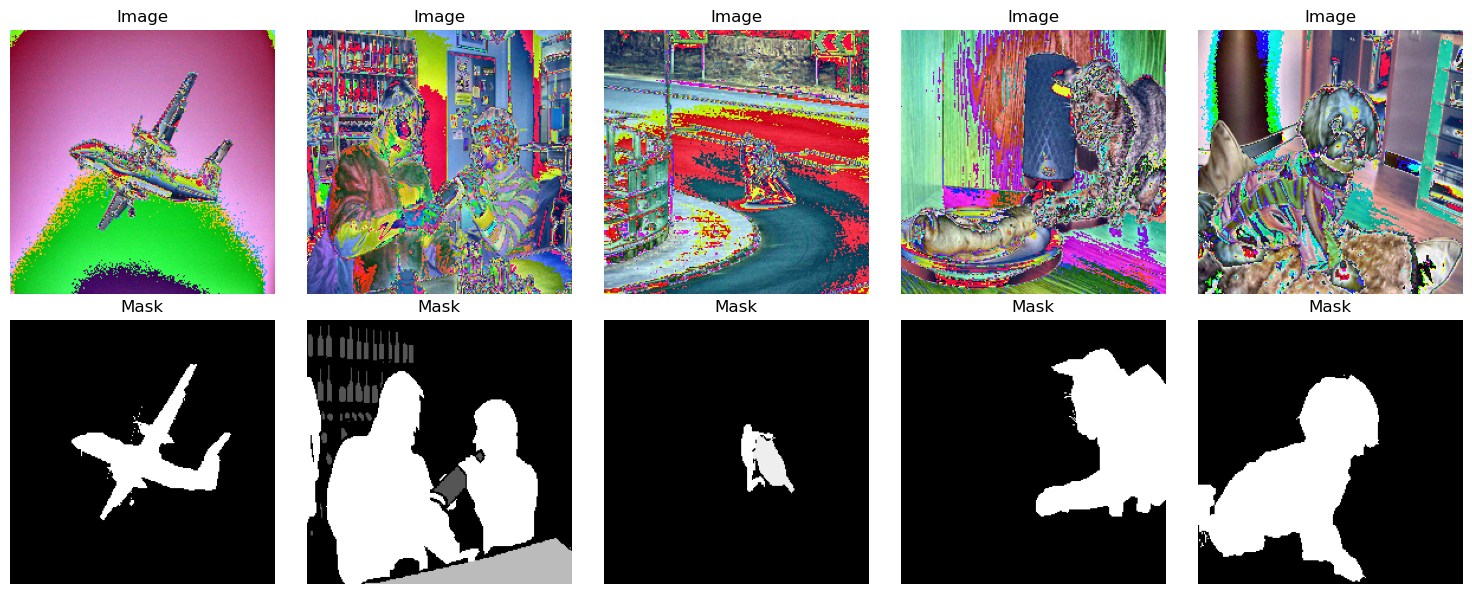

In [10]:
def show_batch(dataloader, num_images=5):
    # Get a batch
    images, masks = next(iter(dataloader))
    
    # Create a figure
    fig, axes = plt.subplots(2, num_images, figsize=(15, 6))
    
    # Convert tensor to image for visualization
    to_pil = T.ToPILImage()
    
    for idx in range(num_images):
        # Display image
        img = to_pil(images[idx])
        axes[0, idx].imshow(img)
        axes[0, idx].axis('off')
        axes[0, idx].set_title('Image')
        
        # Display mask
        mask = masks[idx]
        if mask.dim() > 2:  # If mask has extra dimensions
            mask = mask.squeeze()
        axes[1, idx].imshow(mask, cmap='gray')
        axes[1, idx].axis('off')
        axes[1, idx].set_title('Mask')
    
    plt.tight_layout()
    plt.show()

# Visualize training data
print("Training Data:")
show_batch(train_loader)

# Visualize validation data
print("Validation Data:")
show_batch(val_loader)

# Visualize test data
print("Test Data:")
show_batch(test_loader)